##  Решаем задачу проекта с помощью нейросетей.  
# CNN, LSTM, GRU

## SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# загружаем библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [ ]:
PATH = 'drive/MyDrive/data/diplom_final/'
# PATH = ''

## EDA ...

## Load preprocessing data

In [ ]:
# загружаем предобработанные данные
df = pd.read_csv(PATH+'data_prepare.csv', sep=',')
df.head()

,class,description,numbers
0,Поддержка товаров,товар коллега клиент позвонить сообщить товар ...,25
1,Fiji,проблема открытие зацепка открытие зацепка поя...,16
2,Export buildman,отправляться локальный проверка отправка локал...,12
3,API,находиться адрес число название представлять к...,37
4,Личный Кабинет,заходить лк попасть личный кабинет делать этаж...,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9811 entries, 0 to 9810
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        9811 non-null   object
 1   description  9811 non-null   object
 2   numbers      9811 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 230.1+ KB


In [ ]:
# Максимальное количество слов 
num_words = 50000
# Максимальная длина новости
max_description_len = 100
# Количество классов новостей
nb_classes = 30

In [ ]:
df.head()

,class,description,numbers
0,Поддержка товаров,товар коллега клиент позвонить сообщить товар ...,25
1,Fiji,проблема открытие зацепка открытие зацепка поя...,16
2,Export buildman,отправляться локальный проверка отправка локал...,12
3,API,находиться адрес число название представлять к...,37
4,Личный Кабинет,заходить лк попасть личный кабинет делать этаж...,8


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['class']) 
label_encoder.transform(df['class']) 

array([10,  4,  3, ...,  2, 10,  8])

In [ ]:
df['class_code'] = label_encoder.transform(df['class']) 

In [ ]:
df.head()

,class,description,numbers,class_code
0,Поддержка товаров,товар коллега клиент позвонить сообщить товар ...,25,10
1,Fiji,проблема открытие зацепка открытие зацепка поя...,16,4
2,Export buildman,отправляться локальный проверка отправка локал...,12,3
3,API,находиться адрес число название представлять к...,37,0
4,Личный Кабинет,заходить лк попасть личный кабинет делать этаж...,8,8


In [ ]:
y = df['class_code']
X = df['description']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
y_train.head()

8929    4
7839    7
33      9
7407    5
5130    8
Name: class_code, dtype: int64

In [ ]:
y_train = utils.to_categorical(y_train, nb_classes)
y_test = utils.to_categorical(y_test, nb_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# создаем токенизатор
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
# обучаем токенизатор на описаниях
description = df['description']
tokenizer.fit_on_texts(description)

In [ ]:
tokenizer.word_index

{'клиент': 1,
 'отзыв': 2,
 'компания': 3,
 'лк': 4,
 'доступ': 5,
 'карточка': 6,
 'фирма': 7,
 'проблема': 8,
 'карта': 9,
 'апи': 10,
 'товар': 11,
 'коллега': 12,
 'личный': 13,
 'блокировать': 14,
 'удалить': 15,
 'вопрос': 16,
 'кабинет': 17,
 'город': 18,
 'заявка': 19,
 'работать': 20,
 'реклама': 21,
 'рубрика': 22,
 'пользователь': 23,
 'информация': 24,
 'номер': 25,
 'дать': 26,
 'инфораша': 27,
 'адрес': 28,
 'менеджер': 29,
 'проект': 30,
 'сайт': 31,
 'добавить': 32,
 'сборка': 33,
 'ссылка': 34,
 'сделать': 35,
 'модерация': 36,
 'этаж': 37,
 'запрос': 38,
 'рд': 39,
 'телефон': 40,
 'подсказать': 41,
 'ответ': 42,
 'специалист': 43,
 'помочь': 44,
 'данный': 45,
 'рекламный': 46,
 'ул': 47,
 'сервис': 48,
 'код': 49,
 'продажа': 50,
 'заказ': 51,
 'сеть': 52,
 'проверка': 53,
 'джир': 54,
 'витрина': 55,
 'связь': 56,
 'возможность': 57,
 'отдел': 58,
 'объект': 59,
 'версия': 60,
 'отсутствовать': 61,
 'размещение': 62,
 'вложение': 63,
 'необходимо': 64,
 'поиск': 65

In [ ]:
# преобразуем описания train в числовое представление
sequences_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
# index = 20
# print(description[index])
# print(sequences_train[index])

In [ ]:
X_train_new = pad_sequences(sequences_train, maxlen=max_description_len)

In [ ]:
X_train_new.shape

(8829, 100)

In [ ]:
# преобразуем описания test в числовое представление
sequences_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_test_new = pad_sequences(sequences_test, maxlen=max_description_len)

In [ ]:
X_test_new.shape

(982, 100)

In [ ]:
X_test_new

array([[   0,    0,    0, ..., 5339, 3564, 2207],
       [   0,    0,    0, ...,   48,   10,   10],
       [   0,    0,    0, ...,  287,  491,  105],
       ...,
       [   0,    0,    0, ..., 4289,  653, 8684],
       [   0,    0,    0, ...,   20,  486,   44],
       [   0,    0,    0, ...,  196, 1553,   34]], dtype=int32)

### Сверточная нейронная сеть

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_description_len))
model_cnn.add(Conv1D(256, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(30, activation='softmax'))

In [ ]:
model_cnn.compile(optimizer='adamax', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           1600000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 256)           41216     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1950      
Total params: 1,659,614
Trainable params: 1,659,614
Non-trainable params: 0
______________________________________________

In [ ]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_cnn = model_cnn.fit(X_train_new, 
                            y_train, 
                            epochs=10,
                            batch_size=16,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/10
497/497 [==============================] - 9s 4ms/step - loss: 2.7350 - accuracy: 0.1612 - val_loss: 1.4539 - val_accuracy: 0.6376

Epoch 00001: val_accuracy improved from -inf to 0.63760, saving model to best_model_cnn.h5
Epoch 2/10
497/497 [==============================] - 2s 4ms/step - loss: 1.3314 - accuracy: 0.5951 - val_loss: 0.9219 - val_accuracy: 0.7656

Epoch 00002: val_accuracy improved from 0.63760 to 0.76557, saving model to best_model_cnn.h5
Epoch 3/10
497/497 [==============================] - 2s 4ms/step - loss: 0.8919 - accuracy: 0.7605 - val_loss: 0.7274 - val_accuracy: 0.7961

Epoch 00003: val_accuracy improved from 0.76557 to 0.79615, saving model to best_model_cnn.h5
Epoch 4/10
497/497 [==============================] - 2s 4ms/step - loss: 0.7311 - accuracy: 0.8005 - val_loss: 0.6335 - val_accuracy: 0.8245

Epoch 00004: val_accuracy improved from 0.79615 to 0.82446, saving model to best_model_cnn.h5
Epoch 5/10
497/497 [==============================] - 2

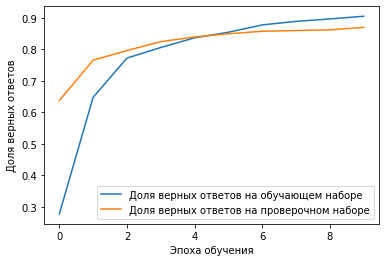

In [ ]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Cеть LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_description_len))
model_lstm.add(SpatialDropout1D(0.8))
model_lstm.add(Bidirectional(LSTM(64, activity_regularizer=regularizers.l2(1e-4), return_sequences=True)))
model_lstm.add(Dropout(0.6))
model_lstm.add(Bidirectional(LSTM(64, activity_regularizer=regularizers.l2(1e-4))))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(30, activation='softmax'))

In [ ]:
model_lstm.compile(optimizer='adamax', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          6400000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 128)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

In [ ]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
callbacks_ltsm_list = [checkpoint_callback_lstm, earlystop]

In [ ]:
history_lstm = model_lstm.fit(X_train_new, 
                              y_train, 
                              epochs=1000,
                              batch_size=16,
                              validation_split=0.1,
                              callbacks=[callbacks_ltsm_list])

Epoch 1/1000
497/497 [==============================] - 15s 22ms/step - loss: 2.9914 - accuracy: 0.0878 - val_loss: 2.2936 - val_accuracy: 0.2661

Epoch 00001: val_accuracy improved from -inf to 0.26614, saving model to best_model_lstm.h5
Epoch 2/1000
497/497 [==============================] - 10s 20ms/step - loss: 2.3119 - accuracy: 0.2168 - val_loss: 1.8071 - val_accuracy: 0.4032

Epoch 00002: val_accuracy improved from 0.26614 to 0.40317, saving model to best_model_lstm.h5
Epoch 3/1000
497/497 [==============================] - 10s 20ms/step - loss: 1.9883 - accuracy: 0.3145 - val_loss: 1.5949 - val_accuracy: 0.4689

Epoch 00003: val_accuracy improved from 0.40317 to 0.46886, saving model to best_model_lstm.h5
Epoch 4/1000
497/497 [==============================] - 10s 20ms/step - loss: 1.8458 - accuracy: 0.3526 - val_loss: 1.4791 - val_accuracy: 0.4915

Epoch 00004: val_accuracy improved from 0.46886 to 0.49151, saving model to best_model_lstm.h5
Epoch 5/1000
497/497 [=============

In [ ]:
model_lstm.load_weights(model_lstm_save_path)
test_loss, test_acc = model_lstm.evaluate(X_test_new, y_test, verbose=1)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

31/31 [==============================] - 0s 10ms/step - loss: 0.4842 - accuracy: 0.8809
Test Loss: 0.4842234253883362
Test Accuracy: 0.8808553814888


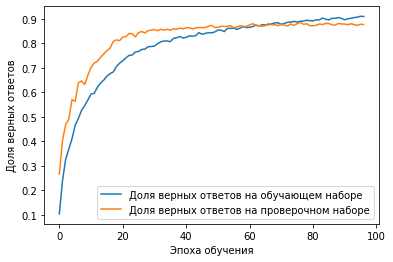

In [ ]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Cеть GRU

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_description_len))
model_gru.add(GRU(128))
model_gru.add(Dense(30, activation='softmax'))

In [ ]:
model_gru.compile(optimizer='adamax', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           1600000   
_________________________________________________________________
gru (GRU)                    (None, 128)               62208     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3870      
Total params: 1,666,078
Trainable params: 1,666,078
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_gru = model_gru.fit(X_train_new, 
                              y_train, 
                              epochs=30,
                              batch_size=16,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/30
497/497 [==============================] - 5s 8ms/step - loss: 2.7252 - accuracy: 0.1000 - val_loss: 2.4311 - val_accuracy: 0.2401

Epoch 00001: val_accuracy improved from -inf to 0.24009, saving model to best_model_gru.h5
Epoch 2/30
497/497 [==============================] - 4s 7ms/step - loss: 2.3511 - accuracy: 0.2330 - val_loss: 1.6561 - val_accuracy: 0.4451

Epoch 00002: val_accuracy improved from 0.24009 to 0.44507, saving model to best_model_gru.h5
Epoch 3/30
497/497 [==============================] - 4s 7ms/step - loss: 1.4951 - accuracy: 0.5124 - val_loss: 1.1584 - val_accuracy: 0.6161

Epoch 00003: val_accuracy improved from 0.44507 to 0.61608, saving model to best_model_gru.h5
Epoch 4/30
497/497 [==============================] - 4s 7ms/step - loss: 1.0668 - accuracy: 0.6494 - val_loss: 1.1054 - val_accuracy: 0.6602

Epoch 00004: val_accuracy improved from 0.61608 to 0.66025, saving model to best_model_gru.h5
Epoch 5/30
497/497 [==============================] - 4

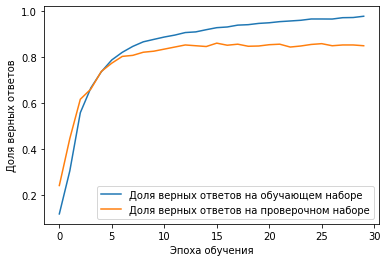

In [ ]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверка на данных для тестирования

### CNN

In [ ]:
model_cnn.load_weights(model_cnn_save_path)

In [ ]:
model_cnn.evaluate(X_test_new, y_test, verbose=1)

31/31 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.8727


[0.43619304895401, 0.8727087378501892]

### LTSM

In [ ]:
model_lstm.load_weights(model_lstm_save_path)

In [ ]:
model_lstm.evaluate(X_test_new, y_test, verbose=1)

31/31 [==============================] - 0s 10ms/step - loss: 0.4842 - accuracy: 0.8809


[0.4842234253883362, 0.8808553814888]

### GRU

In [ ]:
model_gru.load_weights(model_gru_save_path)

In [ ]:
model_gru.evaluate(X_test_new, y_test, verbose=1)

31/31 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.8422


[0.6127030849456787, 0.842158854007721]

Из трех моделей наилучший результат показала модель LSTM

##  Итог:  
В ходе решения изменялись структуры сетей, количество эпох, batch_size, велась борьба с переобучением ... Ориентировочное время каждого рассчета составляло ± 2 часа.
Лучший результат показала сеть на основе LSTM. 